

**Ensemble learning is one way to tackle bias-variance trade-off.**

There are various ways to ensemble *weak* learners to come up with *strong* learners:

1. Bagging
2. Boosting
3. Stacking

## **Random Forest**

*   We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
*   To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
*   The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

#### **How does it work?**

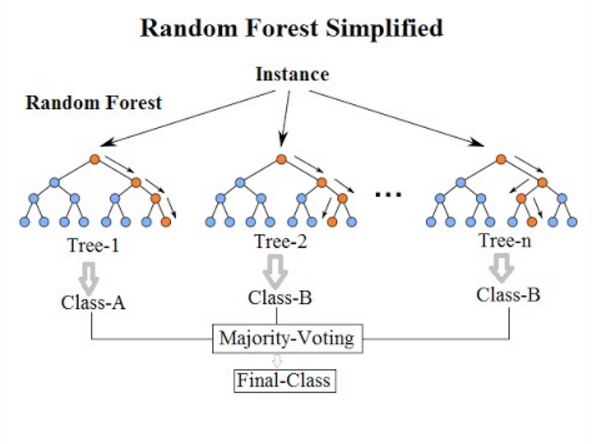



# Implementation

### The dataset has credit card transactions where our objective is to identify the fraudulent transactions.

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [11]:
# read the data

data = pd.read_csv('creditcard.csv')

In [12]:
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.114697  0.796303 -0.149553 -0.823011  0.878763 -0.553152  0.939259   
1 -0.039318  0.495784 -0.810884  0.546693  1.986257  4.386342 -1.344891   
2  2.275706 -1.531508 -1.021969 -1.602152 -1.220329 -0.462376 -1.196485   
3  1.940137 -0.357671 -1.210551  0.382523  0.050823 -0.171322 -0.109124   
4  1.081395 -0.502615  1.075887 -0.543359 -1.472946 -1.065484 -0.443231   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.108502  0.111137 -0.390521  ... -0.335776 -0.807853 -0.055940 -1.025281   
1 -1.743736 -0.563103 -0.616315  ... -1.377003 -0.072200 -0.197573  1.014807   
2 -0.147058 -0.950224  1.560463  ... -0.193271 -0.103533  0.150945 -0.811083   
3 -0.002115  0.869258 -0.001965  ...  0.157994  0.650355  0.034206  0.739535   
4 -0.143374  1.659826 -1.131238  ...  0.224157  0.821209 -0.137223  0.986259   

        V25       V26       V27       V28    V29  Target  
0 -0.369557  0.204653  0.242724  0.085713   0.89       0  
1  1.011293 -0.167684  0.113136  0.256836  85.00       0  
2 -0.197913 -0.128446  0.014197 -0.051289  42.70       0  
3  0.223605 -0.195509 -0.012791 -0.056841  29.99       0  
4  0.563228 -0.574206  0.089673  0.052036  68.00       0  

[5 rows x 30 columns]

In [13]:
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [14]:
# drop null values

data = data.dropna(how= "any")

In [15]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [16]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Fit the object to train the data

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Predict the data

y_pred = clf.predict(X_test)

In [19]:
# Accuracy score

accuracy_score(y_test, y_pred)

0.9993855876415343

In [20]:
# Calculate the ROC score

roc_auc_score(y_test, y_pred)

0.8528532721105321